# Springboard Capstone 2: Data Wrangling

## Default Risk for Small Business Loans

### Load the Data

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the data. Use `low_memory = False` to surpress warnings about columns of mixed data type.
df = pd.read_csv('../Data/Raw/SBAnational.csv', low_memory = False)

In [3]:
# Inspect the dataframe. Scroll to see all columns.
pd.set_option('display.max_columns', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Set column names and data types

The column names are mostly reasonable. For convenience, we rename `LoanNr_ChkDgt` to `ID`

In [4]:
df = df.rename({'LoanNr_ChkDgt': 'ID'})

We include some additional information from Li, Mickel and Taylor about the less-intuitive column names.
- **NAICS:** Industry classification code.
- **Term:** Loan term (months)
- **NoEmp:** Number of employees
- **NewExist:** `1` for a business that has existed more than two years, `2` for one that has not.
- **FranchiseCode:** Both 00000 and 00001 mean "no franchise."
- **UrbanRural:** `1` for urban, `2` for rural, `0` for undefined.
- **LowDoc:** Whether a low-document application was used (good for loans under \$150,000.

In [5]:
## List columns that should be converted to each Data Type.
all_cols = list(df.columns)
date_cols = ['ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate']
int_cols = ['Term', 'NoEmp', 'CreateJob','RetainedJob']
float_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
cat_cols = list(set(all_cols) - set(date_cols + int_cols + float_cols))

In [6]:
df[cat_cols] = df[cat_cols].apply(lambda x : x.astype('category'))
df[int_cols] = df[int_cols].apply(lambda x : x.astype('int'))

In [7]:
## Before being converted to float, the columns with dollar amounts must be cleaned to remove special characters.
df[float_cols] = df[float_cols].apply(lambda x: x.str.strip("$"))
df[float_cols] = df[float_cols].apply(lambda x: x.str.replace(",", ""))
df[float_cols] = df[float_cols].apply(lambda x: x.astype('float'))

In [8]:
# Some loans are listed as 
df['ApprovalFY'] = df['ApprovalFY'].str.strip("A")
df[date_cols] = df[date_cols].apply(lambda x: pd.to_datetime(x, infer_datetime_format = True))

In [9]:
# We check that data types have been converted successfully, and 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  category      
 1   Name               899150 non-null  category      
 2   City               899134 non-null  category      
 3   State              899150 non-null  category      
 4   Zip                899164 non-null  category      
 5   Bank               897605 non-null  category      
 6   BankState          897598 non-null  category      
 7   NAICS              899164 non-null  category      
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  datetime64[ns]
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  category      
 13  CreateJob          899164 non-null  int64   

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997-01-01,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997-01-01,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997-01-01,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997-01-01,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997-01-01,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


### Distribution of categorical variables

We examine the categorical variables. How many values does each one have? What percentage of those values are unique?

In [10]:
categorical = df[cat_cols]

In [11]:
unique_vals = pd.concat([categorical.nunique(), categorical.nunique()/categorical.shape[0]], axis=1)
unique_vals.columns = ["count", "percent"]
unique_vals.sort_values(by = 'count')

,count,percent
MIS_Status,2,0.000002
UrbanRural,3,0.000003
NewExist,3,0.000003
LowDoc,8,0.000009
RevLineCr,18,0.000020
State,51,0.000057
BankState,56,0.000062
NAICS,1312,0.001459
FranchiseCode,2768,0.003078
Bank,5802,0.006453


Notice that name has many repeats. This may be a case of different franchises from the same chain getting loans. Also, some of our columns need cleaning! The columns `NewExist`, `LowDoc` and `RevLineCr` should each have only two values. We examine each of these below.

In [12]:
## Examine the NewExist column
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

It appears that the value `0.0` means unknown or missing in this column. We replace these values with `NaN.'

In [13]:
df.loc[df['NewExist'] == 0.0, 'NewExist'] = np.NaN

In [14]:
## Examine the LowDoc column.
df['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [15]:
df.loc[~df['LowDoc'].isin(['N', 'Y']), 'LowDoc'] = np.NaN

In [16]:
df['LowDoc'].value_counts()

N    782822
Y    110335
0         0
1         0
A         0
C         0
R         0
S         0
Name: LowDoc, dtype: int64

In [17]:
df['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
Q         1
,         1
A         1
-         1
5         1
4         1
3         1
.         1
7         1
Name: RevLineCr, dtype: int64

In [23]:
df.drop(columns = 'RevLineCr', inplace = True)

In [24]:
df.dtypes

LoanNr_ChkDgt              category
Name                       category
City                       category
State                      category
Zip                        category
Bank                       category
BankState                  category
NAICS                      category
ApprovalDate         datetime64[ns]
ApprovalFY           datetime64[ns]
Term                          int64
NoEmp                         int64
NewExist                   category
CreateJob                     int64
RetainedJob                   int64
FranchiseCode              category
UrbanRural                 category
LowDoc                     category
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                 category
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

### Distribution of numerical and date variables

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,887905.0,110.174118,78.471919,0.0,60.0,84.0,120.0,569.0
NoEmp,887905.0,8.908095,12.683576,0.0,2.0,4.0,10.0,99.0
CreateJob,887905.0,1.867026,7.966461,0.0,0.0,0.0,1.0,800.0
RetainedJob,887905.0,3.871718,8.820815,0.0,0.0,1.0,4.0,404.0
DisbursementGross,887905.0,192661.241876,260313.972987,0.0,41000.0,100000.0,230000.0,5294366.0
BalanceGross,887905.0,3.027255,1451.276682,0.0,0.0,0.0,0.0,996262.0
ChgOffPrinGr,887905.0,13253.781589,62238.197437,0.0,0.0,0.0,0.0,3512596.0
GrAppv,887905.0,184223.024371,257517.555609,200.0,35000.0,89000.0,220000.0,1999800.0
SBA_Appv,887905.0,142796.870849,207903.677390,100.0,21040.0,60000.0,169500.0,1999000.0


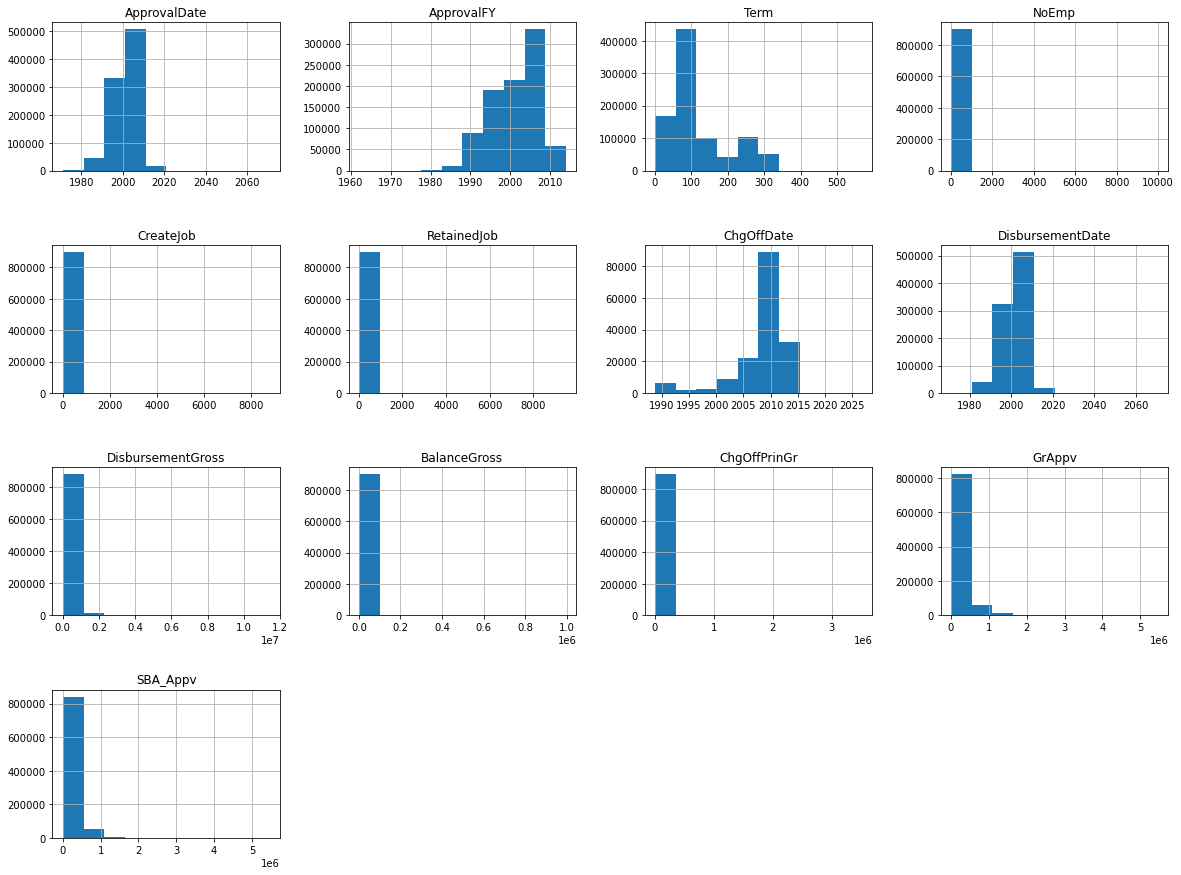

In [25]:
df.hist(figsize = (20, 15))
plt.subplots_adjust(hspace=0.5)

In [39]:
df = df.loc[df['ApprovalDate'] < dt.datetime.strptime("31-12-2014", "%d-%m-%Y")]

In [54]:
df = df.loc[(df['NoEmp'] < 500) & (df['GrAppv'] < 2 * 10**6)]

In [59]:
df = df.loc[(df['CreateJob'] < 1000) & (df['RetainedJob'] < 500)]

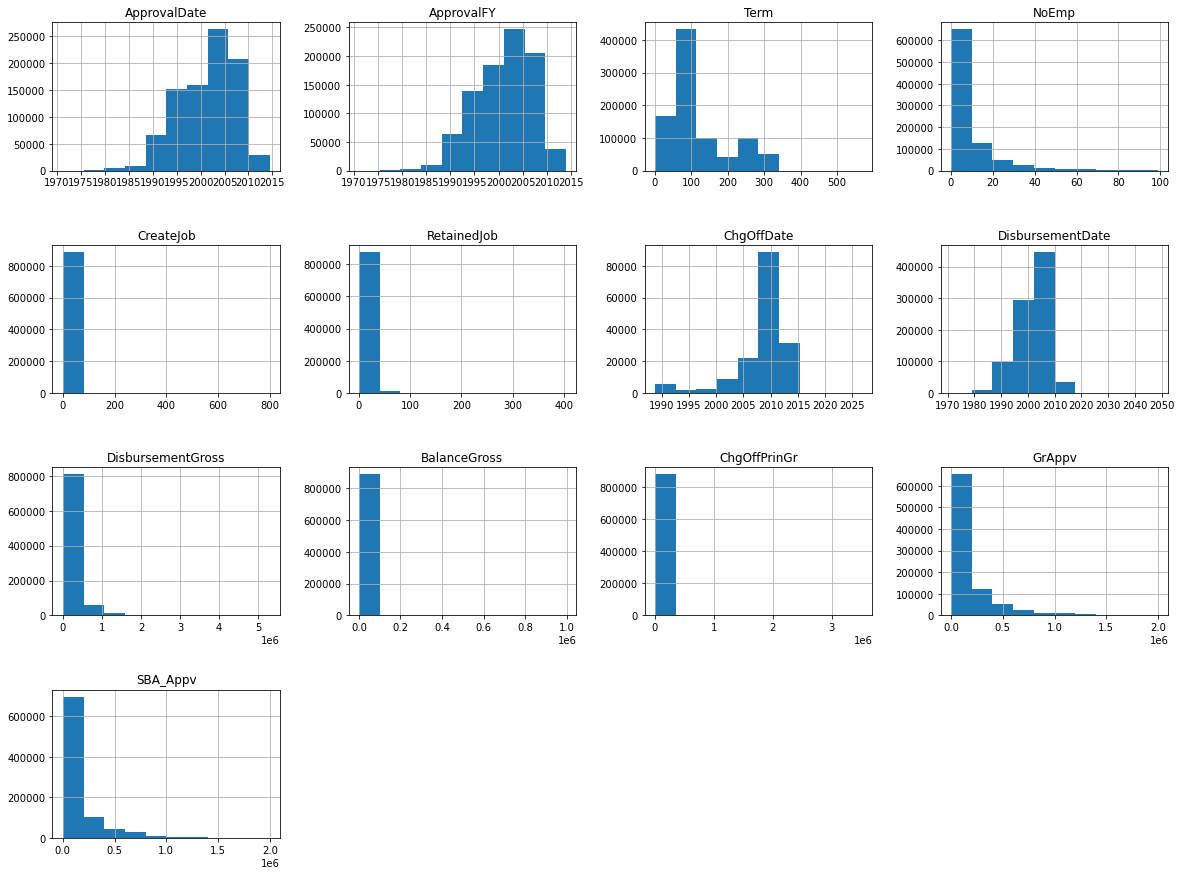

In [72]:
df.hist(figsize = (20, 15))
plt.subplots_adjust(hspace=0.5)

In [65]:
df[df['RetainedJob'] > 100].shape

(136, 26)

### Check for missing data

In [75]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    13
Zip                       0
Bank                   1533
BankState              1540
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist               1135
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
LowDoc                 5948
ChgOffDate           726144
DisbursementDate       2339
DisbursementGross         0
BalanceGross              0
MIS_Status             1951
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64